<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Scrtch_functions_of_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import random

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#Taking centroids and cluster standard deviations.

In [5]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

In [6]:
X,y = make_blobs(n_samples =100,cluster_std = cluster_std,
                 centers = centroids,n_features=2,random_state =2)

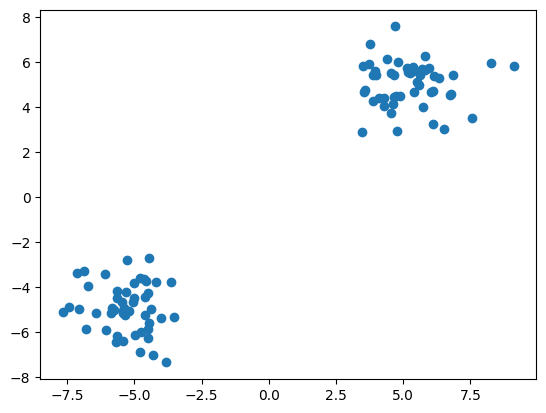

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show()

#Creating KMeans class....

In [17]:
class KMeans:
  def __init__(self,n_clusters =2,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self,X):
    random_index = random.sample(range(0,X.shape[0],sefl.n_clusters))
    self.centroids = X[random_index]

    for i in range(self.max_iter):
      #Assign clusters
      cluster_group = self.assign_cluster(X)

      #move centroids
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X,cluster_group)

      #Check finish
      if (old_centroids == self.centroids).all():
        break

    return cluster_group

  def assign_clusters(self,X):
    cluster_group = []
    distances  = []

    for row in X:
      for centroids in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroids,row-centroids)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)


  def move_centroids(self,X,cluster_group):
    #In cluster_group we already knows that what the points we have 0 or 1.
    #So we just need to saparate the 0 points and 1 points, and calcuate mean saparately..
    #Now they become our new centoids..
    new_centroids = []

    #Extracting unique clusters
    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroid.append(X[cluster_group == type].mean(axis=0))#axis=0 because we want column wise...

    return np.array(new_centroids)